In tasks, use a linear regression model from the sklearn library:

<code>from sklearn.linear_model import LinearRegression</code>

Train the model with default settings (with default arguments when creating an object of the LinearRegression class): <code>LinearRegression().fit(X, y)</code>

[Full description of the linear regression model from the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In total, the dataset contains 159 objects. We have reserved a part of the dataset for the baseline task. In this assignment, it is assumed to work with a dataset containing 119 objects.

# 0. Application of polynomial regression to predict a continuous parameter

The [The provided dataset](https://storage.yandexcloud.net/lms-itmo-ru-files-27a87tyf/machine_learning/task3/task3.2/data/fish_train.csv) consists of seven different types of fish sold in some fish shop. The goal is to predict the mass of the fish from some indirect features known about the fish. The features themselves may need to be synthesized from those that are known.

Use `train_test_split()` to split the dataset into training and test samples with parameters `test_size=0.2, random_state=11`. Use stratification by column Species. Stratification will maintain the proportions of represented objects (by fish type representatives) in the training and test samples.

In [ ]:
# Load the Data
data = pd.read_csv('https://storage.yandexcloud.net/lms-itmo-ru-files-27a87tyf/machine_learning/task3/task3.2/data/fish_train.csv', encoding = 'utf-8', delimiter=',')
data.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550


In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=11, stratify=data['Species'])


Find sample mean for the column <code>Width</code> of the obtained training sample.

In [ ]:
round(np.mean(train['Width']), 3)

np.float64(4.498)

# 1. Building a base model

Remove categorical features and train a linear regression model (<code>LinearRegression()</code>) on the training dataset. Perform predictions on the test dataset.
Evaluate the model using the metric <code>r2_score()</code>.

In [ ]:
species_train = train['Species']
y_train = train[['Weight']]
train.drop(axis=1, columns=['Species', 'Weight'], inplace=True)

In [ ]:
reg = LinearRegression().fit(train, y_train)

In [ ]:
species_test = test['Species']
y_test = test[['Weight']]
test.drop(axis=1, columns=['Species', 'Weight'], inplace=True)

In [ ]:
y_pred = reg.predict(test)
round(r2_score(y_test, y_pred), 3)

0.824

# 2. Adding feature preprocessing

## Use of PCA

> *The top three most correlated features that are dropped: <code>Length1, Length2, Length3</code>*



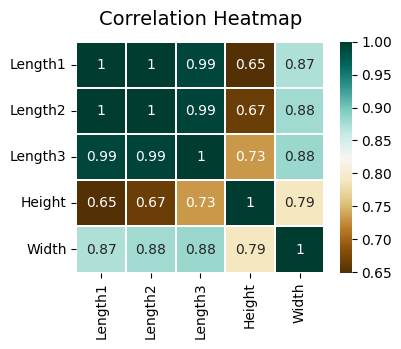

In [ ]:
heatmap = plt.figure(figsize=(4, 3))

heatmap = sns.heatmap(train.corr(), annot=True, cmap="BrBG", linewidths=0.1)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
corr_features = train[['Length1', 'Length2','Length3']]
corr_features.head()

,Length1,Length2,Length3
97,23.6,25.2,27.9
37,40.2,43.5,46.0
21,37.0,40.0,42.5
40,21.2,23.0,25.8
116,37.3,40.0,43.5


Use the principal component analysis to reduce the number of uninformative dimensions. Replace the top three most correlated features with the new feature Lengths whose values coincide with the scores for the first principal component.

In [ ]:
pca = PCA(n_components=3, svd_solver='full').fit(corr_features)
df_train = pca.transform(corr_features)
df1 = pd.DataFrame(df_train, columns=['PC1', 'PC2', 'PC3'])
df1.head()

,PC1,PC2,PC3
0,-5.647250,-0.051676,-0.250579
1,24.959486,-1.087435,0.213041
2,19.068600,-0.906179,0.145159
3,-9.496090,0.340029,-0.043217
4,19.848407,-0.282176,-0.159015


> Train a PCA model for the three most correlated features. Enter the explained variance ratio when using only the first principal component.

In [ ]:
pca1 = PCA(n_components=3, svd_solver='full').fit(corr_features)
print(f'The explained variance ratio when using only the first principal component: {round(pca1.explained_variance_ratio_[0], 3)}')


The explained variance ratio when using only the first principal component: 0.996


In [ ]:
len(df1), len(train)

(95, 95)

In [ ]:
train.drop(axis=1, columns=['Length1', 'Length2','Length3'], inplace=True)
train['Len'] = df1['PC1'].tolist()
train.head()

,Height,Width,Len
97,7.0866,3.9060,-5.647250
37,12.6040,8.1420,24.959486
21,11.7300,7.2250,19.068600
40,10.3458,3.6636,-9.496090
116,12.3540,6.5250,19.848407


In [ ]:
corr_features = test[['Length1', 'Length2','Length3']]
df_test = pca.transform(corr_features)
df2 = pd.DataFrame(df_test, columns=['PC1', 'PC2', 'PC3'])
df2.head()

,PC1,PC2,PC3
0,-9.543681,-0.616883,0.205889
1,-28.287395,-0.532742,-0.201673
2,-8.280821,0.485039,-0.378021
3,-19.131812,-0.425900,0.312029
4,9.874373,0.320864,-0.229763


In [ ]:
test.drop(axis=1, columns=['Length1', 'Length2','Length3'], inplace=True)
test['Len'] = df2['PC1'].tolist()
test.head()

,Height,Width,Len
71,6.2750,3.7250,-9.543681
106,2.4300,1.2690,-28.287395
23,6.9153,3.6312,-8.280821
91,5.2224,3.3216,-19.131812
104,5.7078,4.1580,9.874373


Replace the top three most correlated features with the obtained feature Lengths whose values coincide with the scores for the first principal component. Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions on the test dataset and evaluate the model using <code>r2_score()</code>.

>  Enter <code>r2_score()</code> of the obtained model.

In [ ]:
reg1 = LinearRegression().fit(train, y_train)
y_pred1 = reg1.predict(test)
print(f'The r2_score() of the obtained model: {round(r2_score(y_test, y_pred1), 3)}')

The r2_score() of the obtained model: 0.821


It can be seen that the quality of the model has not changed significantly.

## Feature engineering

Plot the dependencies of the features on the target feature, e.g., by using <code>sns.pairplot()</code>.

It can be seen that the mass, in general, does not depend linearly on the other features. So, in order for the linear model to do a proper predictions, it makes sense to transform the features so that the dependence becomes more similar to a linear one. But how to come up with such a dependence?

It is logical to assume that the mass of a fish should somehow smoothly depend on the other parameters responsible in one way or another for its size. If we remember that mass is the product of density by volume, then

$$
m = \rho \cdot V.
$$

Suppose that the average density of all fish is the same, and recall that in homothety the volume of the object depends on the linear dimensions as a cube, then we obtain

$$
m\sim V\sim d^3
$$

Take to the third degree all the features of training and test datasets that are responsible in one way or another for the fish size (<code>Height, Width, Lengths</code>), and check whether the dependence of mass on these features has become linear.

> Using the dataset obtained at the previous step, cube the values of the features Width, Height, Lengths. Enter the sample mean for the column Width of the training dataset after cubeization.

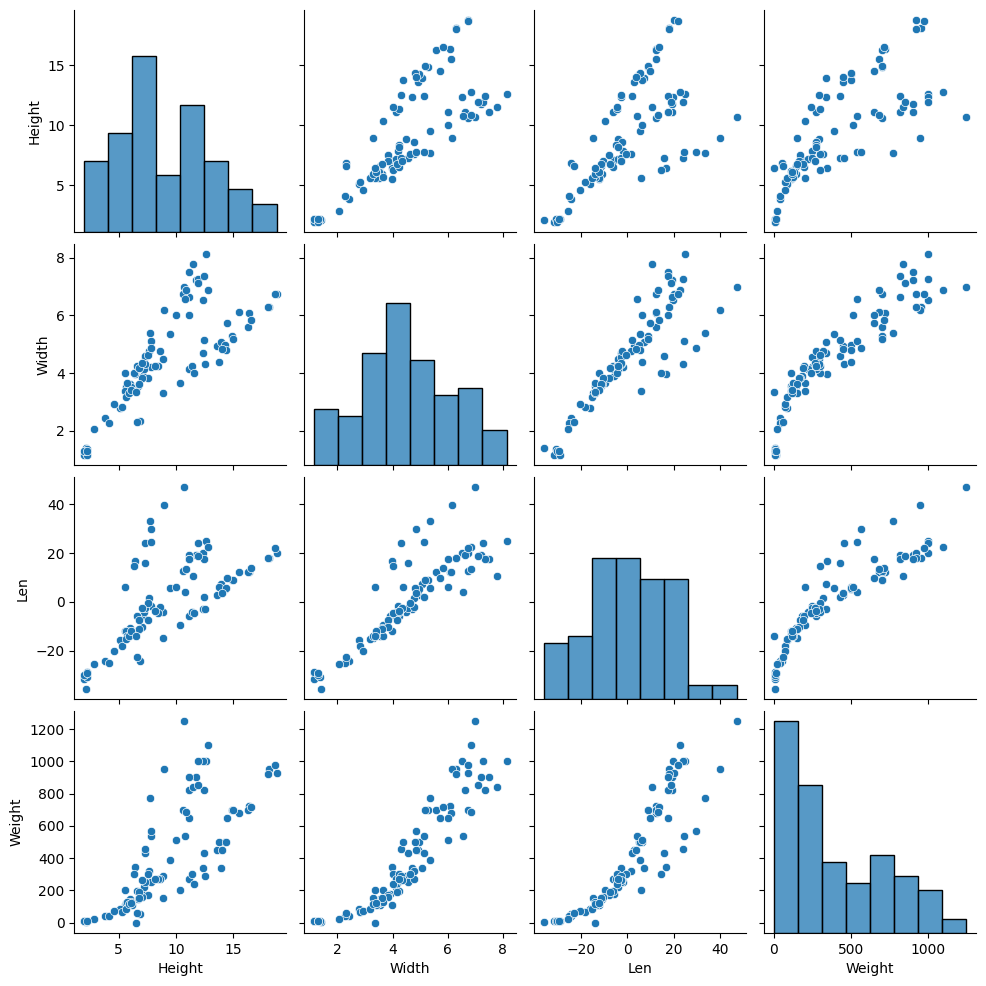

In [ ]:
train_plot = train.copy(deep=True)
train_plot['Weight'] = y_train['Weight'].tolist()
sns.pairplot(train_plot);

In [ ]:
train_cube = train.copy(deep=True)
train_cube['Width'] = train['Width'] * train['Width'] * train['Width']
train_cube['Height'] = train['Height'] * train['Height'] * train['Height']
train_cube['Len'] = train['Len'] * train['Len'] * train['Len']
train_cube.head()

,Height,Width,Len
97,355.888340,59.593201,-180.098859
37,2002.281725,539.750799,15549.159035
21,1613.964717,377.149516,6933.562190
40,1107.368679,49.172711,-856.316681
116,1885.483738,277.805953,7819.463223


Enter the sample mean for the column <code>Width</code> of the training dataset after cubeization.

In [ ]:
round(train['Width'].mean(), 3)

np.float64(4.498)

Choose the images corresponding to the dependence of <code>Weight</code> on <code>Width</code> before the transformation and after.

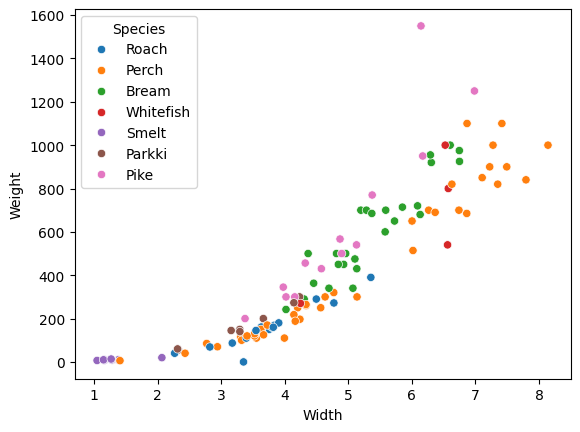

In [ ]:
sns.scatterplot(data=data, x='Width', y='Weight', hue='Species');

> Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions for the test dataset, evaluate the model using `r2_score()`.

In [ ]:
test_cube = test.copy(deep=True)
test_cube['Width'] = test['Width'] * test['Width'] * test['Width']
test_cube['Height'] = test['Height'] * test['Height'] * test['Height']
test_cube['Len'] = test['Len'] * test['Len'] * test['Len']

In [ ]:
reg2 = LinearRegression().fit(train_cube, y_train)
y_pred2 = reg2.predict(test_cube)
round(r2_score(y_test, y_pred2), 3)

0.97

Note how such uncomplicated feature work helped dramatically improve the quality of the model!

## Adding categorical features

> Add the previously excluded categorical features to the dataset obtained in the previous step, having previously performed one-hot encoding using pd.get_dummies(). Train the linear regression model. Enter r2_score() of the obtained model.

Perform the <code>one-hot</code> encoding of the categorial feature `Species`, e.g., using <code>pd.get_dummies()</code>.

Train a linear regression model on the obtained training dataset. Perform predictions for the test dataset, evaluate the model using the <code>r2_score()</code>.

<b>Note</b>: We purposely used stratified splitting so that all values of a categorical feature <code>Species</code> are present in all datasets. But this is not always possible. You can read about how to deal with this problem, for example, [here](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [ ]:
train1 = train_cube.copy(deep=True)
train1['Species'] = species_train

In [ ]:
train1 = pd.get_dummies(train1, columns=['Species'])

In [ ]:
test1 = test_cube.copy(deep=True)
test1['Species'] = species_test
test1 = pd.get_dummies(test1, columns=['Species'])

In [ ]:
reg3 = LinearRegression().fit(train1, y_train)

In [ ]:
y_pred3 = reg3.predict(test1)
round(r2_score(y_test, y_pred3), 3)

0.968

Once again, the quality has increased.

It can be seen that after `one-hot` encoding the features became correlated. You can get rid of this, for example, by using the `drop_first=True` parameter. Re-train the model after correcting this flaw. Perform predictions for the test dataset, evaluate the model using <code>r2_score()</code>.

In [ ]:
train2 = train_cube.copy(deep=True)
train2['Species'] = species_train

train2 = pd.get_dummies(train2, columns=['Species'], drop_first=True)

In [ ]:
test2 = test_cube.copy(deep=True)
test2['Species'] = species_test
test2 = pd.get_dummies(test2, columns=['Species'], drop_first=True)

In [ ]:
reg4 = LinearRegression().fit(train2, y_train)

In [ ]:
y_pred4 = reg4.predict(test2)
round(r2_score(y_test, y_pred4), 3)

In [ ]:
y_pred4 = reg4.predict(test2)
round(r2_score(y_test, y_pred4), 3)

0.968

On such a relatively small dataset, though, we see no difference.